### SQL
#### Datatypes
* Text VARCHAR
* Integer
* BLOB (Binary data)
* REAL - 8bits (Reales de poca precision)
* NUMERIC limitless - Precision Matematica

* Default - Cuando definimos un default, al insertar datos en este campo, si el dato es Null se completa automaticamente con este valor

#### IDENTIFICADORES
Una forma de definir a los datos de manera UNICA<br>

#### AS 
Es un Alias para identificar en la vista o visualizacion 

### Condiciones
#### ORDER BY

#### WHERE

#### Operadores de Comparacion
- >
- <>
- <
- = 

#### UPDATE
Para actualizar un registro en especifico, hay que utilizar el campo unico + WHERE.<BR>


#### AND
es la condicion de interseccion, es cuando se cumple condicion #1 mas la condicion #2.
#### OR
es la condicion de Union, es cuando se cumple condicion #1 O se cumple la condicion #2.

#### NOT

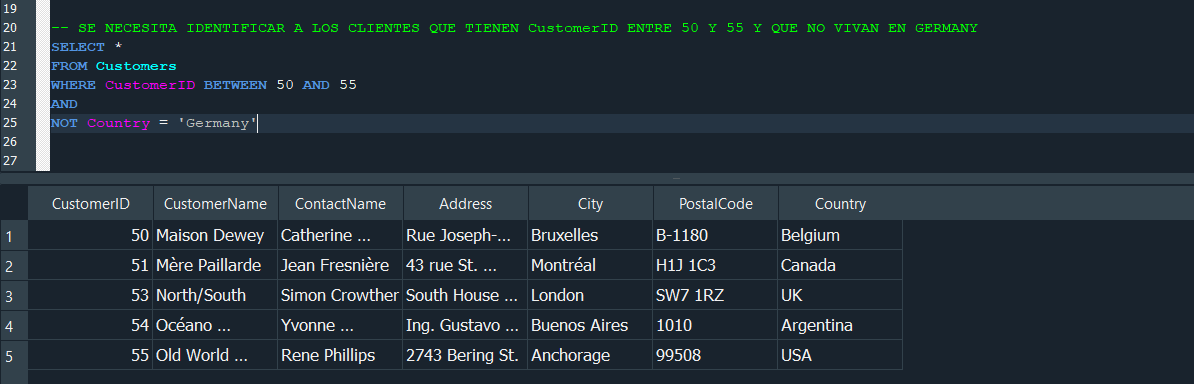

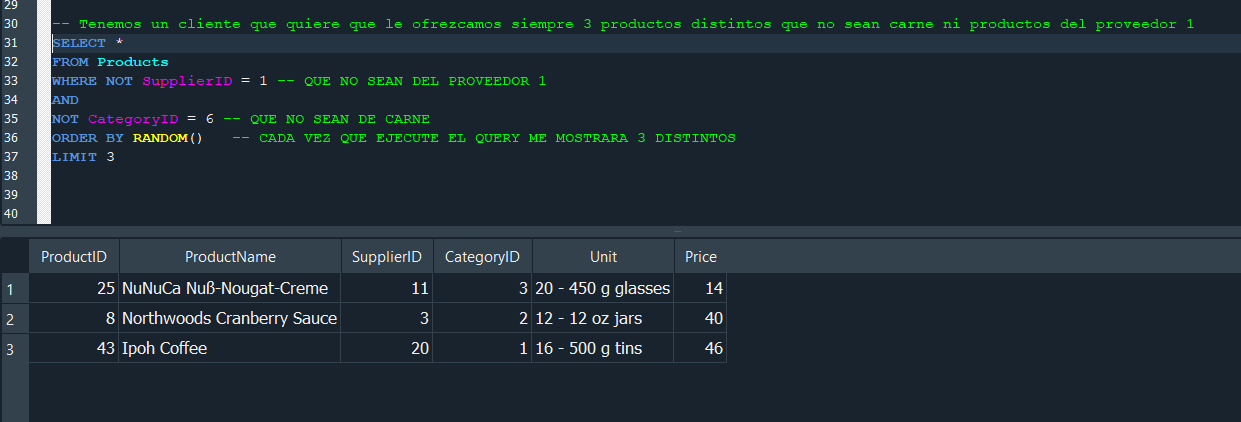

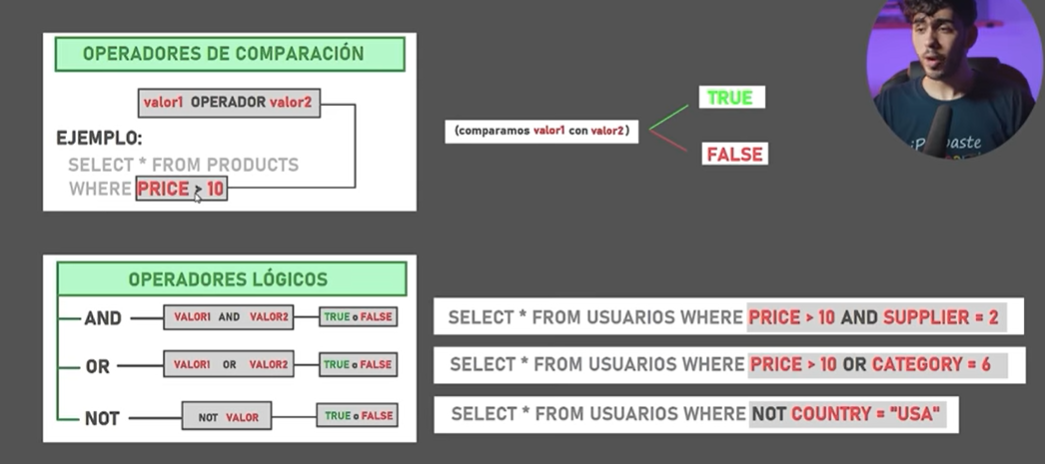

Diferencia entre operadores logicos y operadores de Comparacion.<br>
El Where actua como un bucle, donde compara cada registro con la condicion<br>

##### condicion 1 AND condicion 2
Solo me va a devolver el registro cuando ambas condiciones sean TRUE, es decir TRUE AND TRUE == TRUE

##### condicion 1 OR condicion 2
Solo me va a devolver el registro cuando ALGUNA DE LAS condiciones sean TRUE, es decir:<br>
    -  TRUE OR FALSE == TRUE<br>
    -  TRUE OR TRUE == TRUE<br>
    -  FALSE OR TRUE == TRUE<br>
    -  FALSE OR FALSE == FALSE<br>

##### NOT Condicion #1
Solo me devuelve el registro cuando la condicion #1 sea FALSE. 



##### BETWEEN

Es ideal para buscar fechas<br>
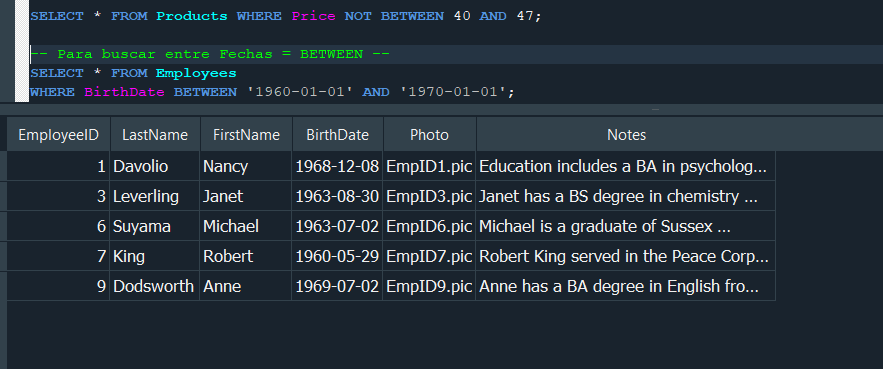

**Los limites de la sentencia, con BETWEEN, estan incluidos en el rango a seleccionar** 
##### NOT BETWEEN

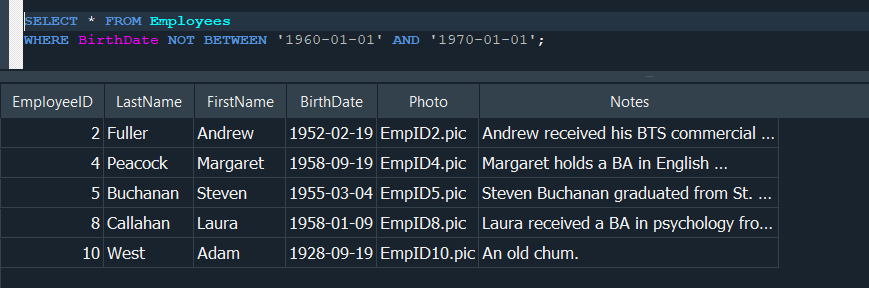

##### En sql los booleanos se escriben con 0 (FALSE) o 1 (TRUE) ya que no distingue la sentencia con TRUE OR FALSE

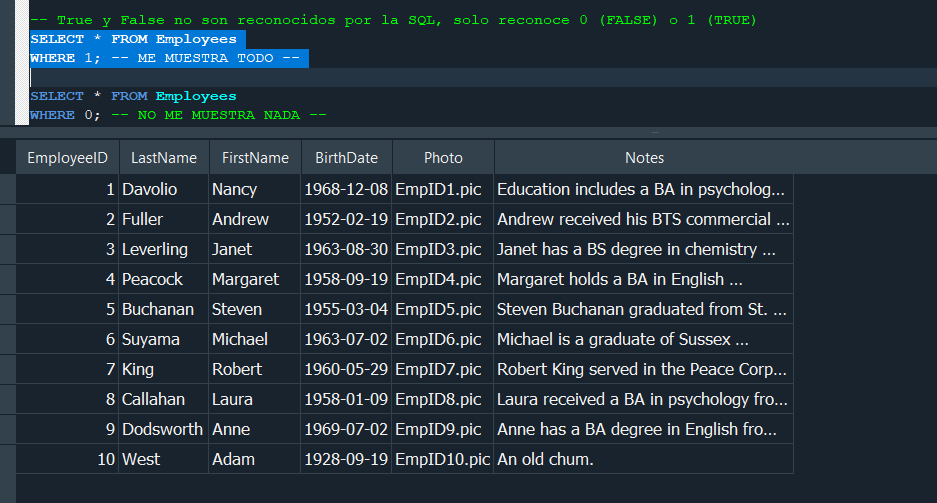

#### LIKE
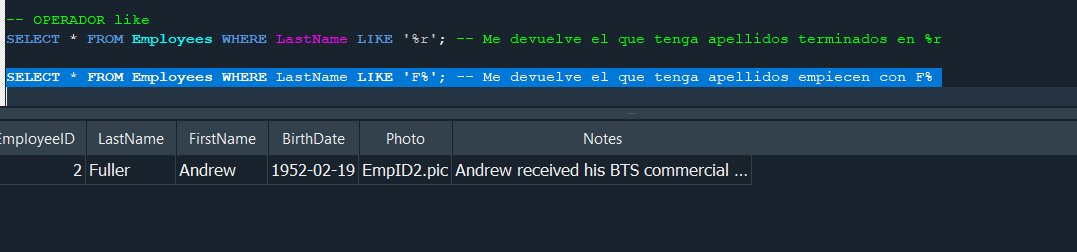

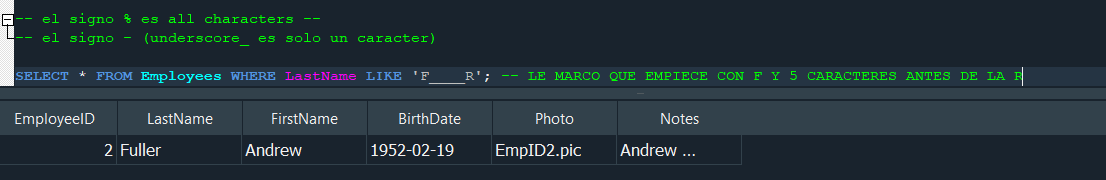

De esta manera podemos buscar patrones, si es que no sabemos exactamente lo que estamos buscando, ya sea que sabemos si empieza con alguna letra, o termina en alguna letra o contenga un patron de caracteres, como decir que contiene '%XXX%'.

#### IN
Es otro tipo de operador LOGICO<br>

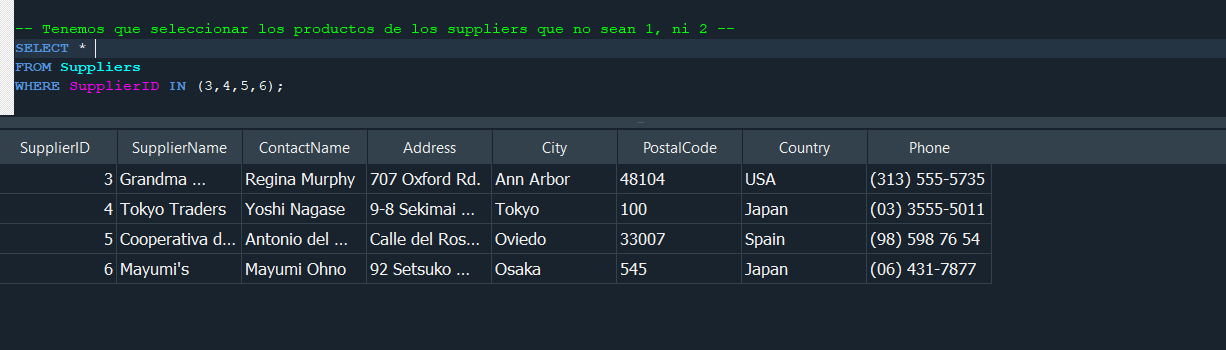

#### NOT IN
Nos devuelve todos los suppliers que no estan en la lista<br>
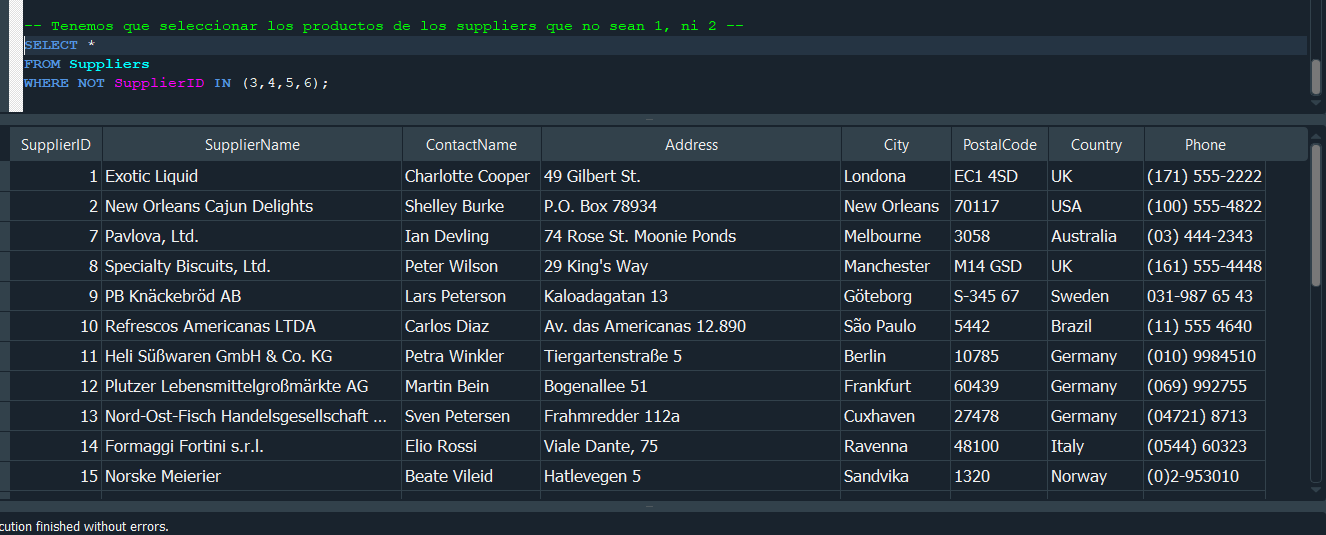

**Con IN puedo hacer subConsultas, para relacionar tablas entre ellas.**

#### FUNCIONES DE AGREGACION
Se utilizan con la clausula SELECT. <br>
Sirven para saber:  <br>
- El nro de registros de una tabla ==> COUNT() <br>
- EL promedio de un conjunto de valores ==> AVG() <br>
- El valor Maximo o Minimo de un campo ==> MAX() o MIN() <br>
- El valor de la fila anterior o de la fila siguiente <br>

Por ejemplo, cuantos empleados hay en la Tabla Employees<br>
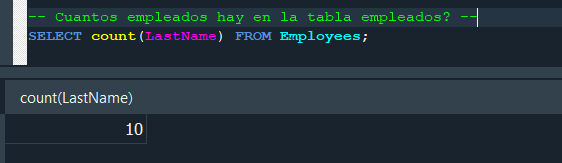 <br>

Cual es el valor promedio de los precios?
<br>
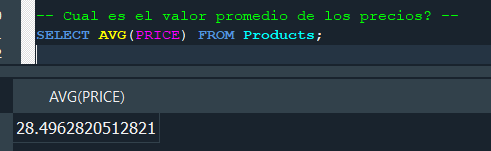 <br>

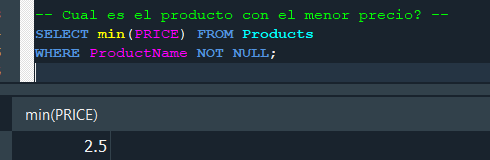<BR>



#### GROUP BY
Se utiliza para agrupar varios registros segun uno o varios valores de columnas.<br>
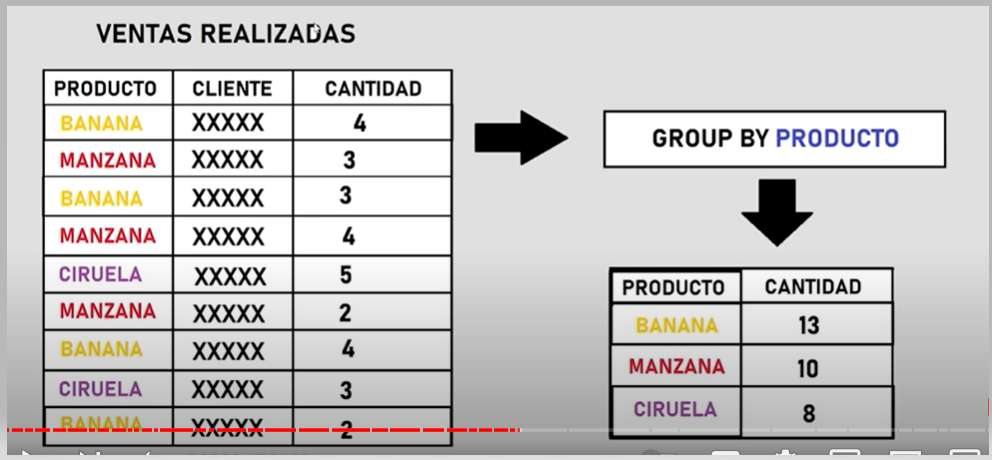

Utilizo AVG() sobre el campo price, y luego un Group By por el SupplierID, me daria el precio promedio de los productos de ese Proveedor.<br>
<br>

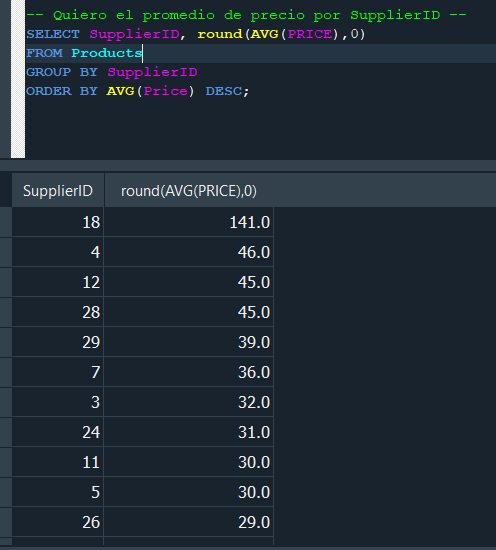
#### HAVING
Si ahora quisieramos conocer todos los proveedores cuyos precios Promedios sean mayores a 40, no podemos usar el **WHERE**  **porque WHERE no funciona sobre funciones de Agregacion.**<br>
Entonces utilizamos el **HAVING**
<br>

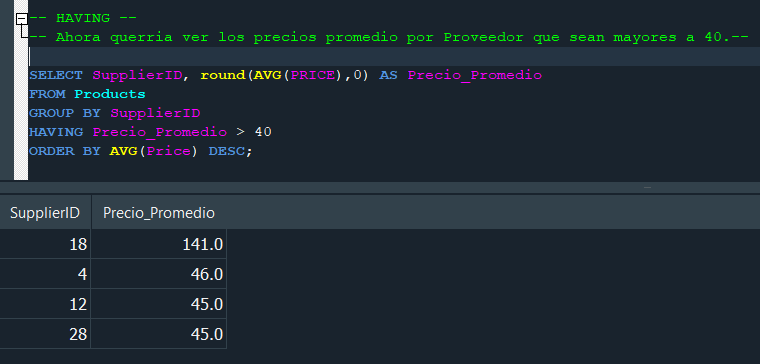
<br>


Si utilizo una clausula WHERE, en esta consulta, primero filtra y luego calcula el promedio de lo que quedo, entonces el promedio varia<br>

 

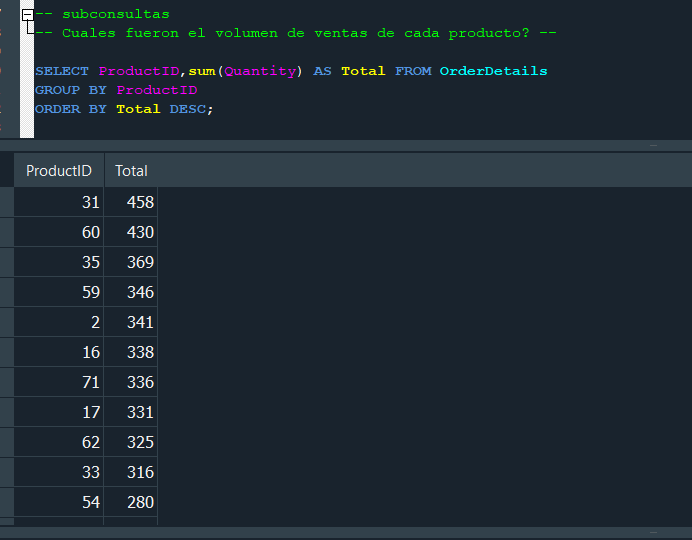

Ahora querria obtener solo el producto mas vendido <br>

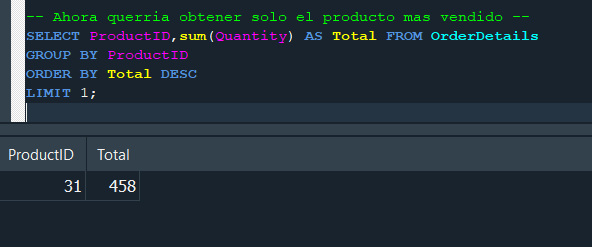

Simplemente cambio el **ORDER BY** para que los ordene de menor a mayor, y que me muestre solo el primer registro, el menos vendido<br>
<br>

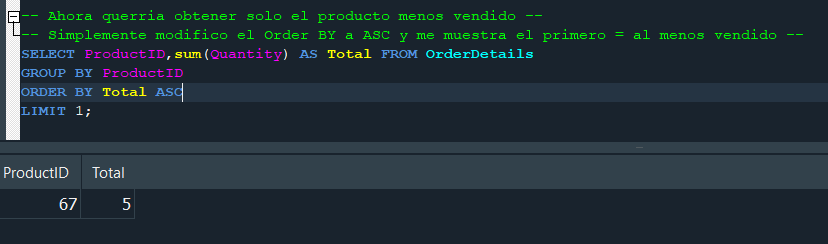

No podemos utilizar funciones de Agregacion sobre funciones de Agregacion.<br>
No podemos aplicar la funcion SUM, y luego sobre SUM aplicar MAX()<br>
Entonces, como podemos hacer??<br>

Mientras el **WHERE** filtra **REGISTROS**, El **HAVING** Filtra **AGRUPACIONES** solo con **GROUP BY**.

El orden es 
SELECT <BR>
FROM <BR>
WHERE (FILTRAMOS REGISTROS) <BR>
GROUP BY (AGRUPAMOS) <BR>
HAVING (FILTRAMOS UNA AGRUPACION DE DATOS) <BR>
ORDER BY <BR>
LIMIT <BR>

No se pueden utilizar funciones de Agrupacion dentro de Funciones de Agrupacion<br>

Entonces como se puede hacer?

-- Cual es el producto que mas se vendio en Ventas? Cantidad * Precio? <br>
-- Necesitamos unir las tablas de Productos y de OrderDetails <br>

## SUBCONSULTAS
Estamos relacionando las tablas atraves de los identificadores para obtener informacion combinada<br>
Por ejemplo, queremos el Volumen de Ventas en $$ (Precio * Cantidad), ya que el volumen de ventas en cantidad no es igual a Cantidad de Plata por esa venta.
Entonces, debemos combinar Tablas a traves de **SubConsultas**
<br>

##### Que es una SUBCONSULTA?
Es una consulta anidada<br>
Es decir una consulta, que esta adentro de otra consulta<br>
<br>
Ejecutan una consulta, subconsulta, y sobre esos resultados se ejecuta la consulta principal.<br>
Nos permite un mejor filtrado<br>
Se pueden anidar limitless subconsultas dentro de una consulta.<br>
<br>
Las subconsultas solo muestran visualizaciones, no sirven para UPDATE, solo con SELECT.
Es decir, no alteran las bases de Datos<br>
<br>
#### SUBCONSULTA EN EL SELECT <br>
SELECT (SUBCONSULTA)...<BR>
<br>
Tambien se puede utilizar en el WHERE:<br>
<br>
SELECT * FROM<br>
WHERE(subconsulta)<br>

Entonces, se realiza sobre el filtro de WHERE la consulta principal.<br>

Consultas de Primer nivel.<br>
-- Un anidado<br>
Consulta de Segundo Nivel<br>
-- Dos Anidados<br>
Consulta de Tercer Nivel<br>
-- Tres anidados<br>
<br>
Supongamos que ahora queremos averiguar las ventas en $$ por Producto, pero en la tabla OrderDetails solo tenemos la cantidad, y tampoco podemos saber el Nombre del Producto.<br>
Entonces, necesitamos relacionar las tablas OrderDetails con la Tabla Products<br>
Y combinar las consultas<br>
Es decir, con la primer consulta, encontramos las ventas por ProductId y las cantidades, ordenadas de Mayor a menor<br>

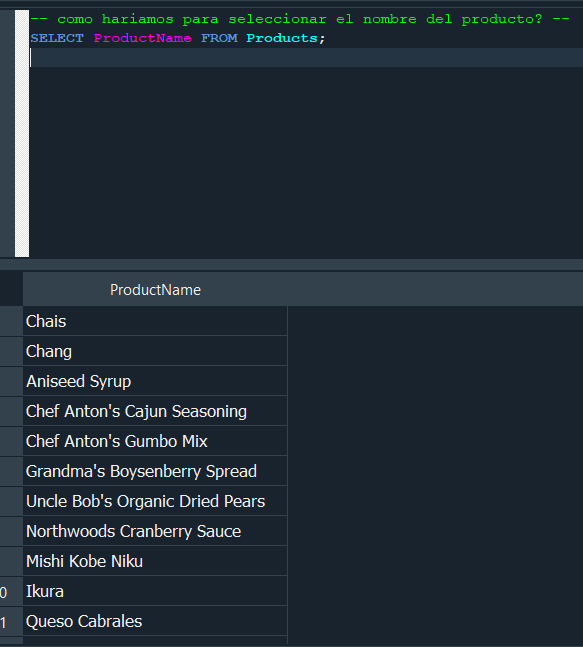

EN la otra tabla<br>
Seleccionamos las ventas en cantidad por ProductID<br>

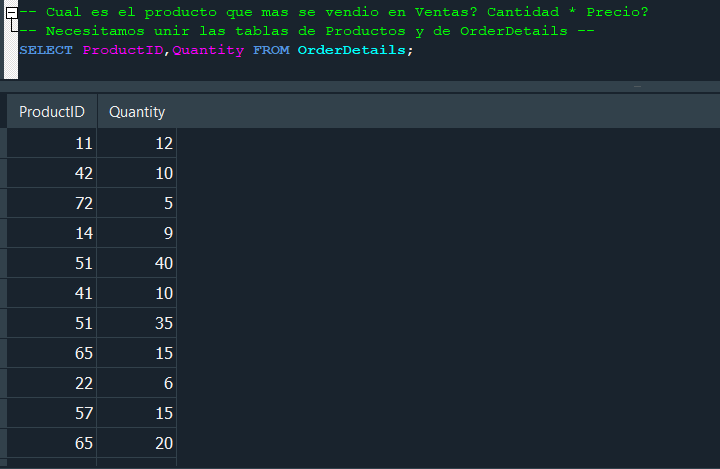

Entonces, lo que necesitamos es que para cada ProductId encuentre el ProductName en la tabla Products, lo mismo con los precios<br>

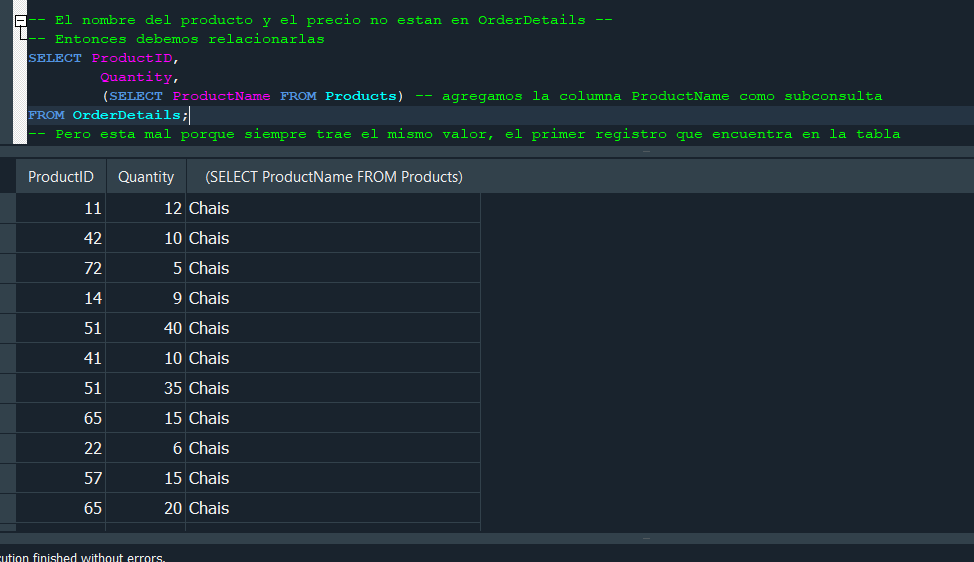
<br>
Entonces, necesitamos que para cada ProductId encuentre el ProductName<br>
Esto lo logramos haciendo que para cada registro que recorre la consulta principal, hacemos referencia a la tabla secundaria Products.<br>

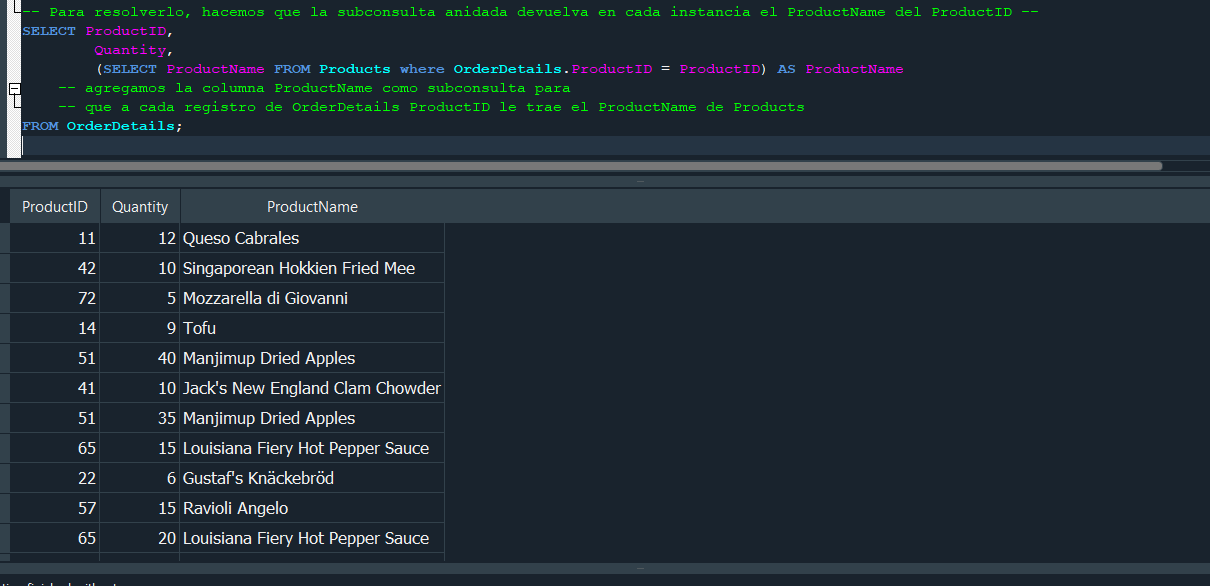



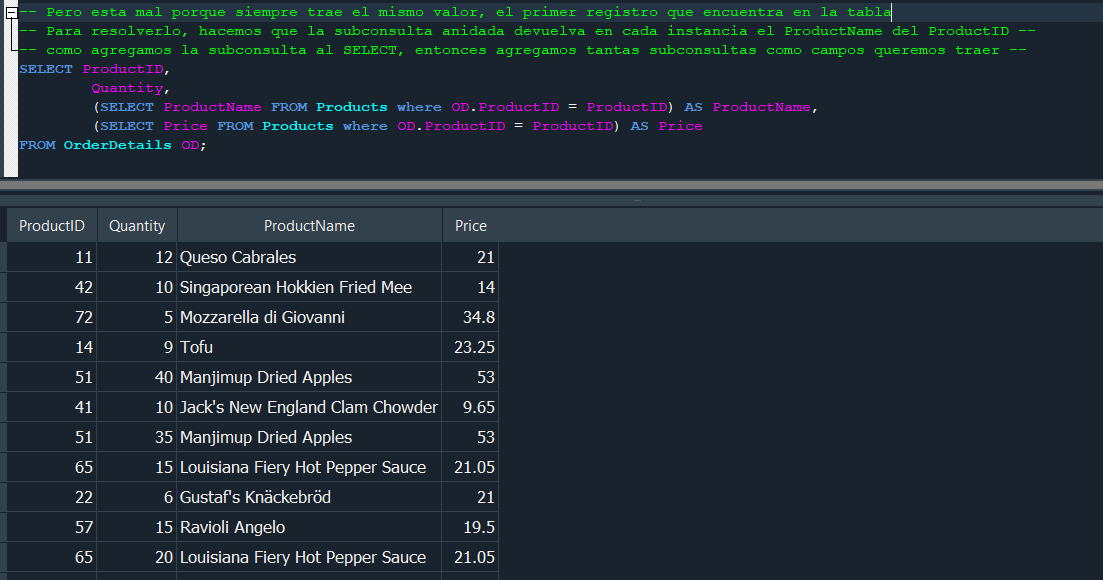

Ahora ya tenemos en la misma vista, todos los datos que necesitamos, y ya estan relacionados, ahora podemos realizar el calculo del Total de Ventas multiplicando <br>
Ventas = Precio * Cantidad <br>

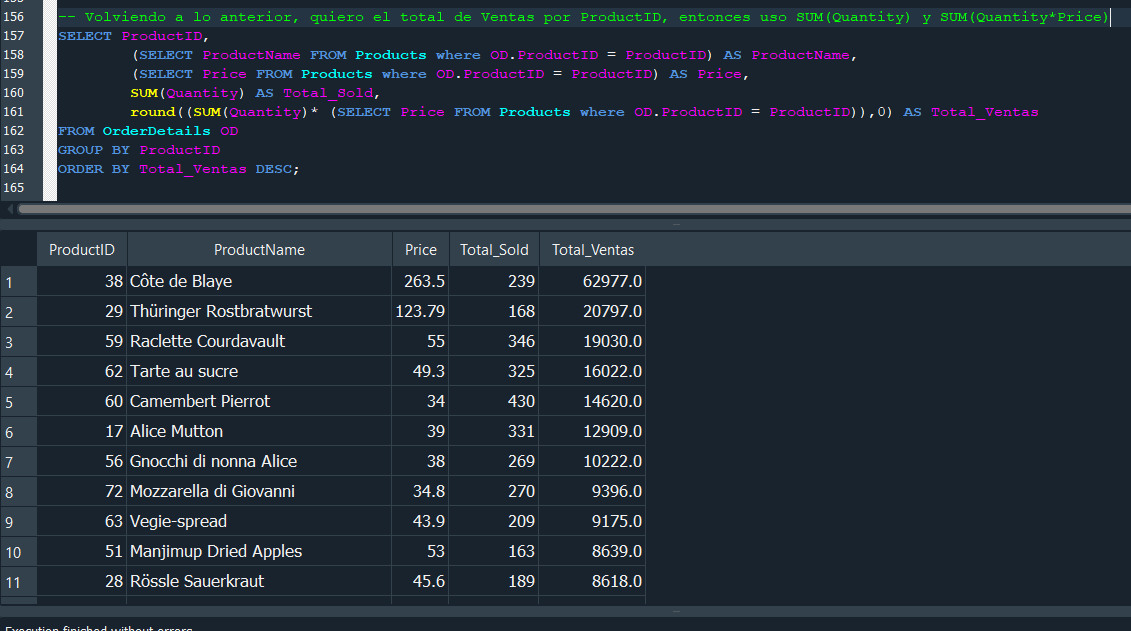

Cual es el producto menos vendido? En cantidad y en Ventas totales?<br>

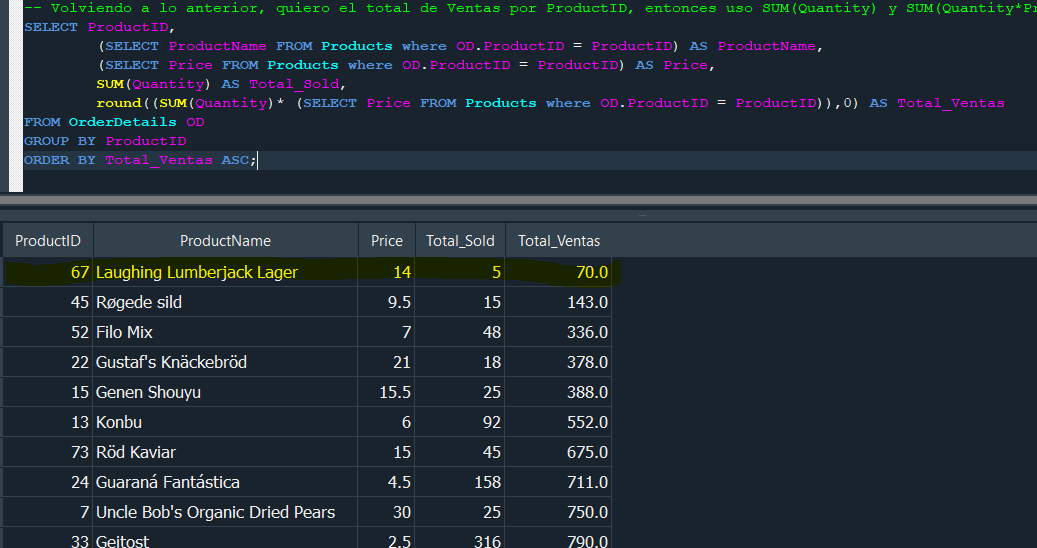



Cual es el producto mas vendido en Cantidad y en Ventas?
Cantidad<br>
<br>


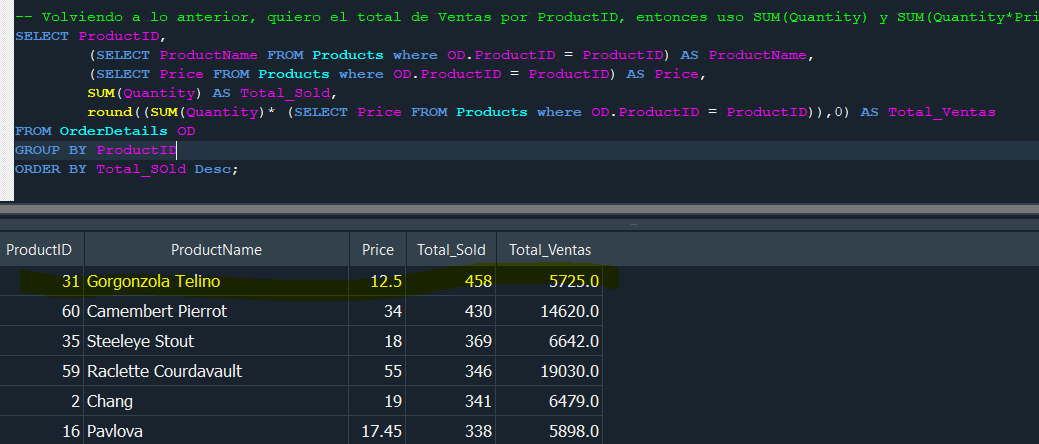

Por Ventas<br>
<br>

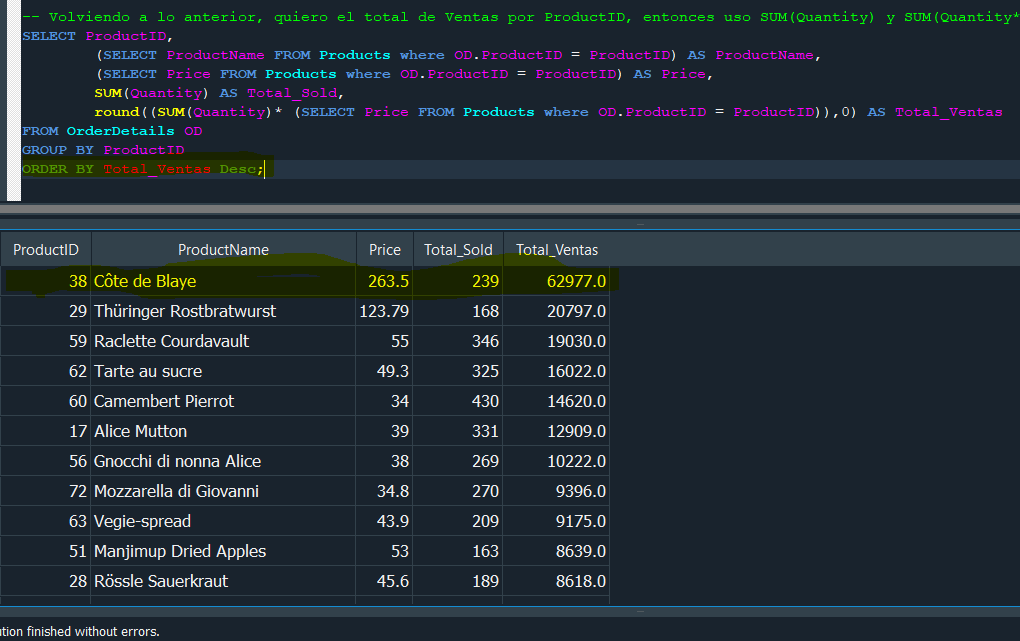


#### SUBCONSULTA en el **WHERE**<br>

La subconsulta hace que para cada ProductID, busque el precio y lo compare con nuestra condicion, si es True se agrega a la vista, si es FALSE, lo deja y sigue<br>
Aca nos muestra todos los productos cuyo Precio es mayor a 40, y muestra el total de Ventas en cantidad y en Plata, y el ProductName<br>
**De todos estos quiero hacer una subconsulta en el WHERE, entonces me filtra los registros cuyo precio es mayor a 40, antes de traerlos a la vista y hacer el total de Ventas y Total de Cantidad, Filtra REGISTROS con la subconsulta**
<br>

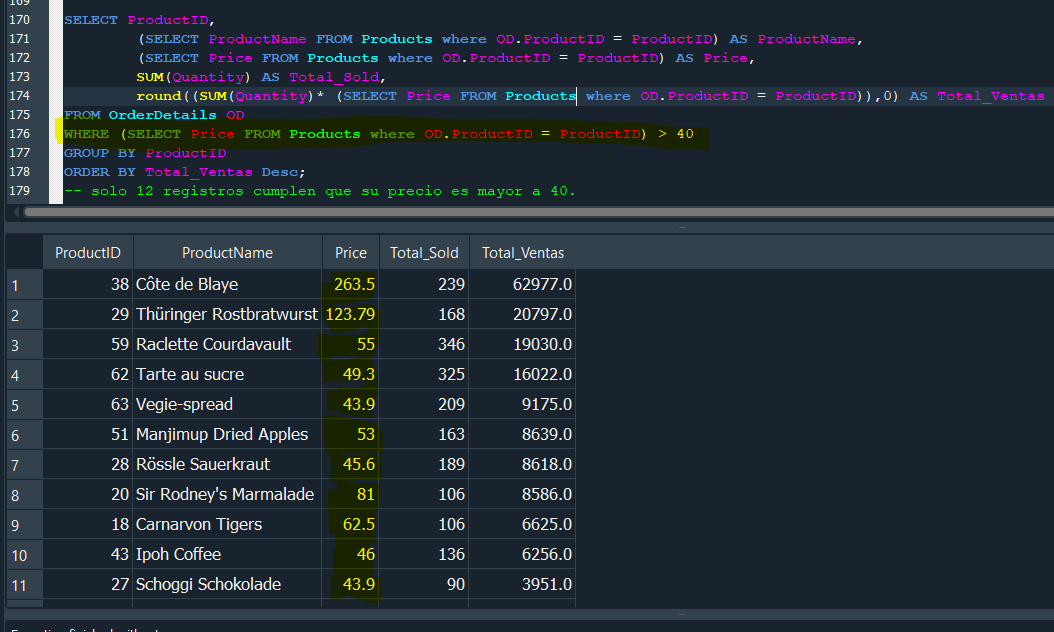

#### SUBCONSULTA en el **FROM**
Al colocar la subconsulta en el FROM, lo que hago es pedirle los datos pero de una seleccion, de una tabla filtrada, entonces no es sobre todos los campos de esa Tabla o es sobre otra **Tabla relacionada**.<br>
De esta forma la subconsulta se ejecuta sobre una Tabla que es a su vez una subconsulta.<br>
Entonces, las subconsultas se vuelven para SQL una Tabla filtrada de maneras complejas<br>

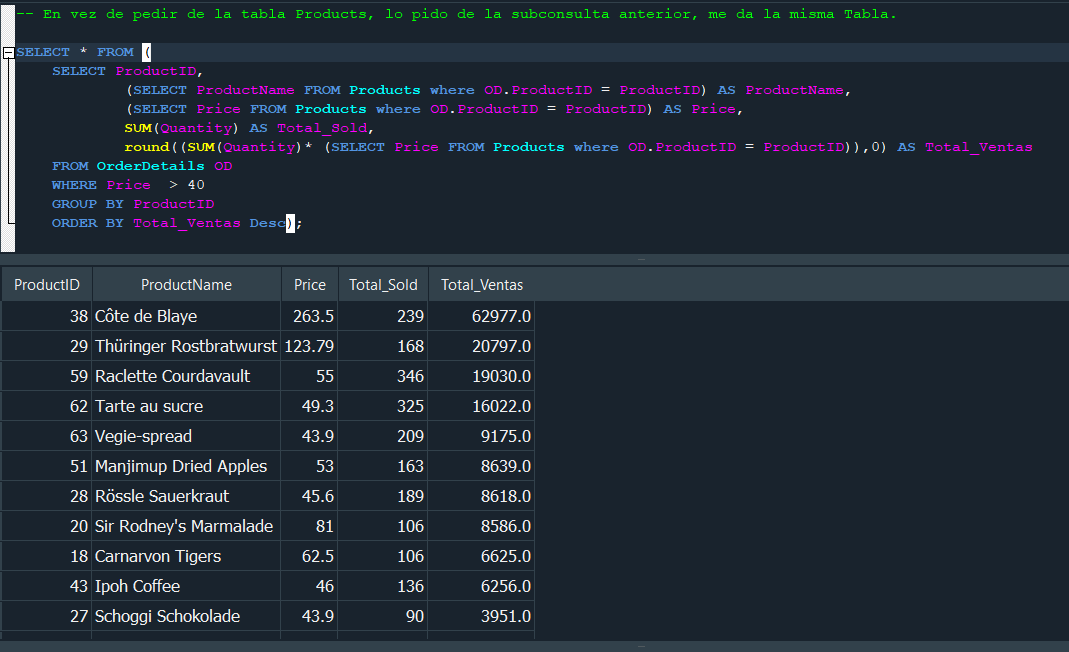

Entonces, luego puedo seguir usando las condiciones o limitaciones de siempre que se ejecutan sobre el filtro<br>
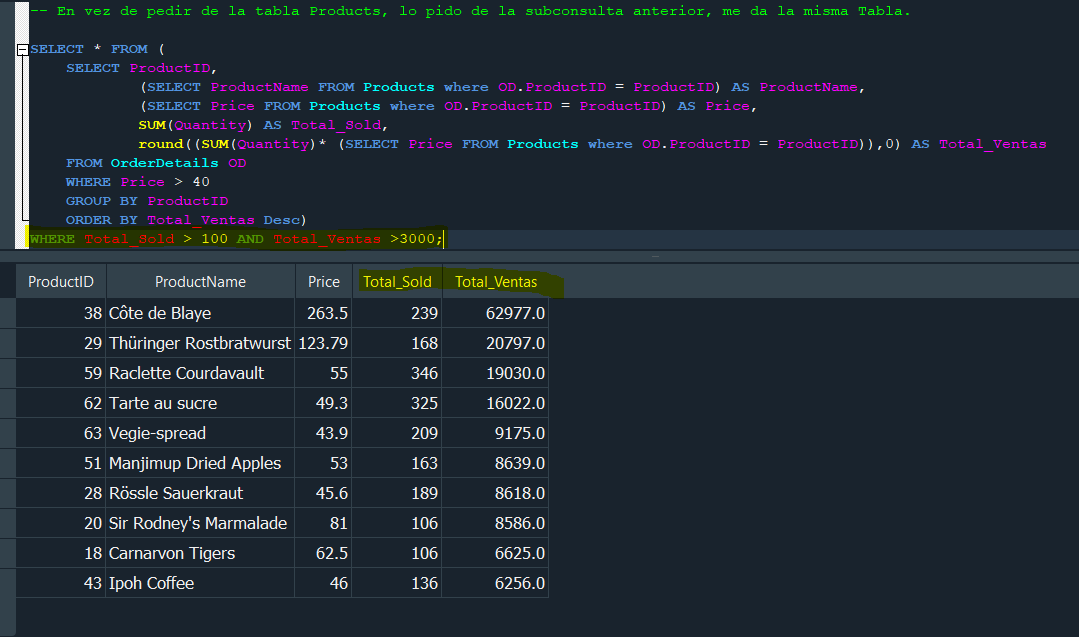


##### EJERCICIO
 Obtener a los empleados que lograron vender mas cantidad de unidades que el promedio vendido, cantidad<BR>
 


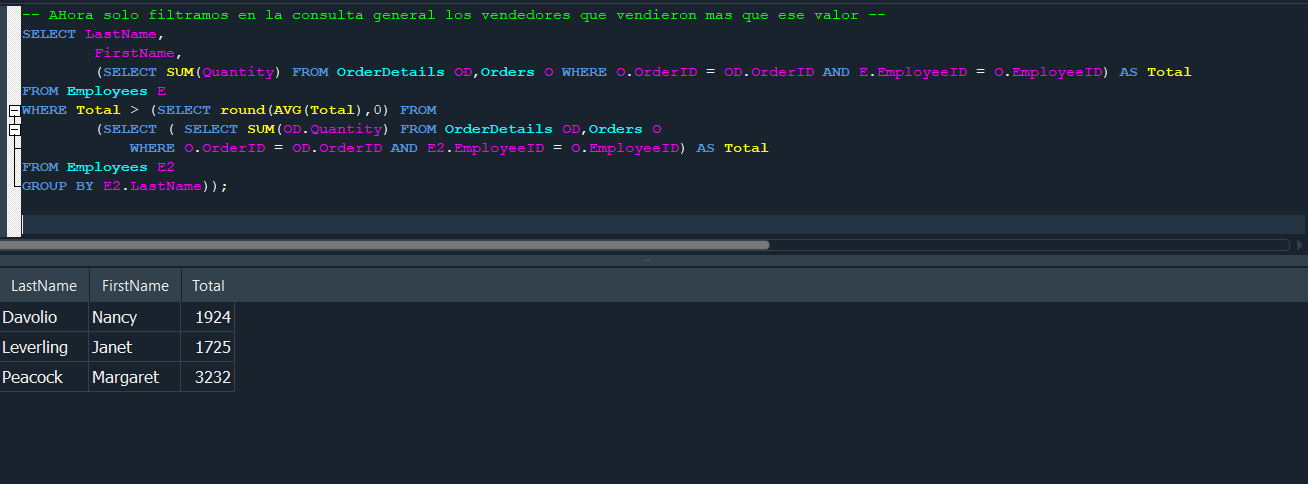

## JOINS

En comparacion con las subconsultas, son optimos y mucho mas legibles<br>

Con JOIN se logra la relacion entre dos o varias tablas de manera eficiente<br>

## UNION ALL VS UNION

## CARDINALIDAD

La *cardinalidad* especifica como es la *relacion* entre *ENTIDADES* de una Base de Datos<br>

Tipos de Cardinalidades:

*   Uno a Uno (1:1): Cuando para un registro de una tabla se corresponde un solo y unico registro de otra tabla<br>

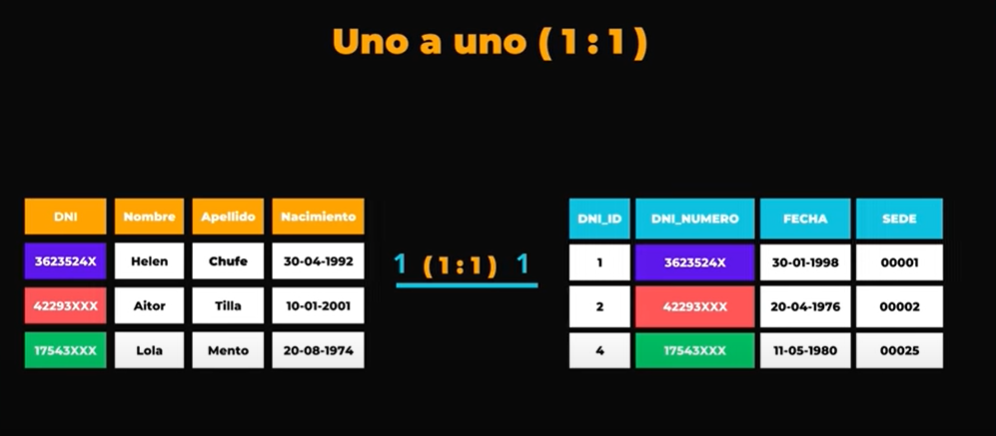

Ejemplo: Personas - DNI<br>
Cada persona tiene un solo y unico DNI<br> 

*   Uno a muchos (1:n): Cuando para un registro de la Tabla A le corresponden muchos o varios registros de la Tabla B<br>

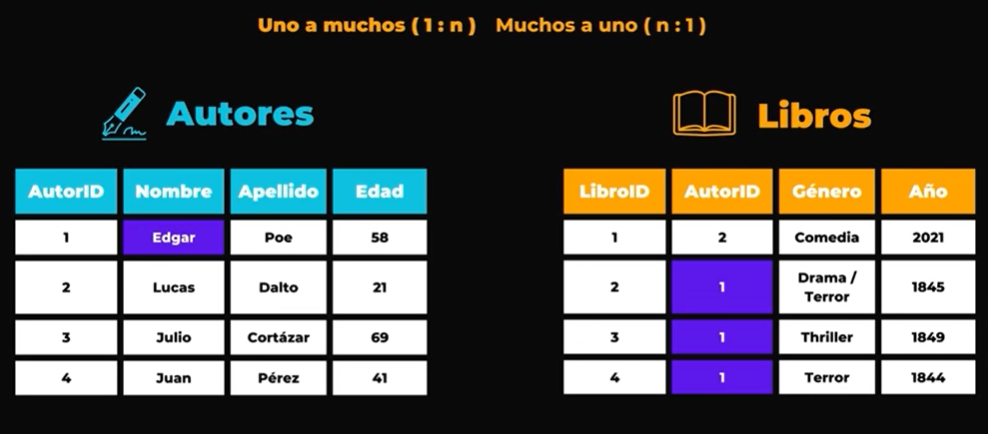
Ejemplo, Autores a Libros.<br>
A cada autor le corresponden varios libros, pero a Cada libro le corresponde un unico autor<br>

*   Muchos a Uno (n:1): Es igual a la anterior, solo que las Tablas estan invertidas<br>

*   Muchos a Muchos (n:n): Cuando a varios registros de la misma tabla le corresponden varios registros de otra Tabla<br>

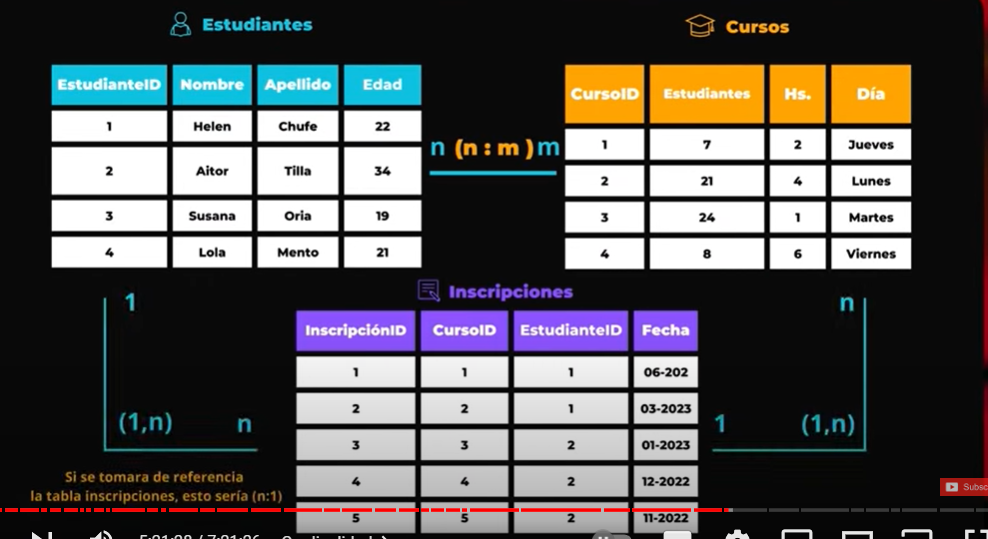
Ejemplo, Estudiantes a Cursos. Un estudiante puede tomar varios cursos y en un mismo Curso pueden haber varios Estudiantes<br>
Para poder manejar estos, se crea una Tabla auxiliar, INSCRIPCIONES.<br>

La cardinalidad nos sirve para entender como se relacionan las Tablas y asi poder saber como vincularlas de manera eficiente<br>
